# load data into Stata

In [41]:
use "/Users/ning/Downloads/Q2/Q2.dta", clear

# list all variable names in the dataset

In [42]:
ds

gpa  act


# list all the observations in your dataset

In [43]:
list


     +-----------+
     | gpa   act |
     |-----------|
  1. | 2.8    21 |
  2. | 3.4    24 |
  3. |   3    26 |
  4. | 3.5    27 |
  5. | 3.6    29 |
     |-----------|
  6. |   3    25 |
  7. | 2.7    25 |
  8. | 3.7    30 |
     +-----------+


# compute summary statistics

In [44]:
sum


    Variable |        Obs        Mean    Std. Dev.       Min        Max
-------------+---------------------------------------------------------
         gpa |          8      3.2125    .3833592        2.7        3.7
         act |          8      25.875    2.850439         21         30


# regression

In [45]:
reg gpa act


      Source |       SS           df       MS      Number of obs   =         8
-------------+----------------------------------   F(1, 6)         =      8.20
       Model |  .594024707         1  .594024707   Prob > F        =    0.0287
    Residual |  .434725292         6  .072454215   R-squared       =    0.5774
-------------+----------------------------------   Adj R-squared   =    0.5070
       Total |     1.02875         7  .146964286   Root MSE        =    .26917

------------------------------------------------------------------------------
         gpa |      Coef.   Std. Err.      t    P>|t|     [95% Conf. Interval]
-------------+----------------------------------------------------------------
         act |   .1021978    .035692     2.86   0.029     .0148626     .189533
       _cons |   .5681319   .9284214     0.61   0.563    -1.703633    2.839897
------------------------------------------------------------------------------


# plot data points and regression line

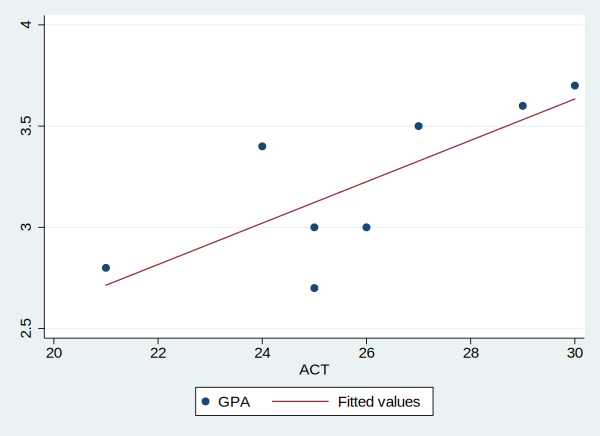

In [46]:
twoway scatter gpa act || lfit gpa act

# compute prediction residual

In [47]:
predict uhat, residual

In [48]:
list


     +-----------------------+
     | gpa   act        uhat |
     |-----------------------|
  1. | 2.8    21    .0857142 |
  2. | 3.4    24     .379121 |
  3. |   3    26   -.2252747 |
  4. | 3.5    27    .1725275 |
  5. | 3.6    29    .0681318 |
     |-----------------------|
  6. |   3    25   -.1230769 |
  7. | 2.7    25   -.4230769 |
  8. | 3.7    30    .0659341 |
     +-----------------------+


# compute the summary statistics of prediction residual

In [49]:
tabstat uhat, stat(mean)


    variable |      mean
-------------+----------
        uhat |  2.79e-09
------------------------


# predict for a given value of X

## insert an empty observation at the end of the table

In [50]:
set obs `=_N+1'

gen id = _n

list


number of observations (_N) was 8, now 9



     +----------------------------+
     | gpa   act        uhat   id |
     |----------------------------|
  1. | 2.8    21    .0857142    1 |
  2. | 3.4    24     .379121    2 |
  3. |   3    26   -.2252747    3 |
  4. | 3.5    27    .1725275    4 |
  5. | 3.6    29    .0681318    5 |
     |----------------------------|
  6. |   3    25   -.1230769    6 |
  7. | 2.7    25   -.4230769    7 |
  8. | 3.7    30    .0659341    8 |
  9. |   .     .           .    9 |
     +----------------------------+


# replace the value of act of the last obs as 20

In [51]:
replace act  = 20 if id == 9

list


(1 real change made)


     +----------------------------+
     | gpa   act        uhat   id |
     |----------------------------|
  1. | 2.8    21    .0857142    1 |
  2. | 3.4    24     .379121    2 |
  3. |   3    26   -.2252747    3 |
  4. | 3.5    27    .1725275    4 |
  5. | 3.6    29    .0681318    5 |
     |----------------------------|
  6. |   3    25   -.1230769    6 |
  7. | 2.7    25   -.4230769    7 |
  8. | 3.7    30    .0659341    8 |
  9. |   .    20           .    9 |
     +----------------------------+


# predict all observations, including the one you just insert

In [52]:
predict yhat

list


(option xb assumed; fitted values)


     +---------------------------------------+
     | gpa   act        uhat   id       yhat |
     |---------------------------------------|
  1. | 2.8    21    .0857142    1   2.714286 |
  2. | 3.4    24     .379121    2   3.020879 |
  3. |   3    26   -.2252747    3   3.225275 |
  4. | 3.5    27    .1725275    4   3.327472 |
  5. | 3.6    29    .0681318    5   3.531868 |
     |---------------------------------------|
  6. |   3    25   -.1230769    6   3.123077 |
  7. | 2.7    25   -.4230769    7   3.123077 |
  8. | 3.7    30    .0659341    8   3.634066 |
  9. |   .    20           .    9   2.612088 |
     +---------------------------------------+


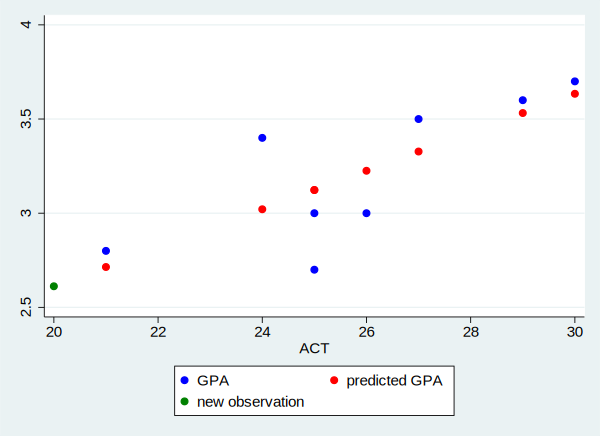

In [60]:
twoway (scatter gpa act if id <9, color(blue)) (scatter yhat act if id <9, color(red)) (scatter yhat act if id == 9, color(green)), legend(label(1 "GPA") label(2 "predicted GPA") label(3 "new observation"))

# How much of the variation in GPA for these eight students is explained by ACT?

## that's just R2

In [64]:
quietly reg gpa act
display "the regression R2 is " e(r2)



the regression R2 is .57742377


In [65]:
!jupyter nbconvert --to html Q2_Stata.ipynb


[NbConvertApp] Converting notebook Q2_Stata.ipynb to html
[NbConvertApp] Writing 594691 bytes to Q2_Stata.html
